In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import researchpy as rp
from scipy import stats
import os
import warnings

In [4]:
loan = pd.read_csv(r"C:\Users\Balakrishna_Vema\Documents\Data science\Data sets\cs-training.csv")

In [5]:
loan.shape

(150000, 12)

In [6]:
loan.rename(columns={'SeriousDlqin2yrs':"default","RevolvingUtilizationOfUnsecuredLines":"revol_pct",
                    'NumberOfTime30-59DaysPastDueNotWorse':"no_30_59_def",
                    'NumberOfOpenCreditLinesAndLoans':"cnt_open_loans",
                    'NumberOfTimes90DaysLate':"no_of_90_late",
                    'NumberRealEstateLoansOrLines':"cnt_real_esate_loans",
                    'NumberOfTime60-89DaysPastDueNotWorse':"no_60_89_def",
                    'NumberOfDependents':"depdents"},inplace=True)

In [7]:
loan.head()

,Sr_No,default,revol_pct,age,no_30_59_def,DebtRatio,MonthlyIncome,cnt_open_loans,no_of_90_late,cnt_real_esate_loans,no_60_89_def,depdents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [8]:
loan["no_30_59_def"]=loan["no_30_59_def"].astype("category")
loan["cnt_open_loans"]=loan["cnt_open_loans"].astype("category")
loan["cnt_real_esate_loans"]=loan["cnt_real_esate_loans"].astype("category")
loan["no_60_89_def"]=loan["no_60_89_def"].astype("category")
loan["no_of_90_late"]=loan["no_of_90_late"].astype("category")
loan["depdents"]=loan["depdents"].astype("category")

In [10]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
Sr_No                   150000 non-null int64
default                 150000 non-null int64
revol_pct               150000 non-null float64
age                     150000 non-null int64
no_30_59_def            150000 non-null category
DebtRatio               150000 non-null float64
MonthlyIncome           120269 non-null float64
cnt_open_loans          150000 non-null category
no_of_90_late           150000 non-null category
cnt_real_esate_loans    150000 non-null category
no_60_89_def            150000 non-null category
depdents                146076 non-null category
dtypes: category(6), float64(3), int64(3)
memory usage: 7.7 MB


In [11]:
loan.describe().T

,count,mean,std,min,25%,50%,75%,max
Sr_No,150000.0,75000.500000,43301.414527,1.0,37500.750000,75000.500000,112500.250000,150000.0
default,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
revol_pct,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0


In [14]:
import researchpy as rp
def chae_summary(data1):
    data2=data1.select_dtypes(include="category")
    ab=rp.summary_cat(data2)
    return ab

In [15]:
chae_summary(loan)

,Variable,Outcome,Count,Percent
0,no_30_59_def,0.0,126018,84.01
1,,1.0,16033,10.69
2,,2.0,4598,3.07
3,,3.0,1754,1.17
4,,4.0,747,0.50
...,...,...,...,...
142,,8.0,24,0.02
143,,10.0,5,0.00
144,,9.0,5,0.00
145,,20.0,1,0.00


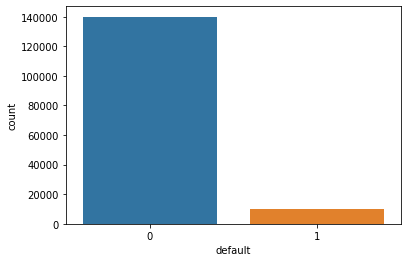

In [19]:
sns.countplot(loan["default"])

In [20]:
import pingouin as pg

In [21]:
pg.ttest(loan["age"], loan["default"])

C:\Users\Balakrishna_Vema\AppData\Local\Continuum\anaconda3\lib\site-packages\pingouin\bayesian.py:150: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df)**(-(df + 1) / 2) / integr)


,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,1369.161435,299998,two-sided,0.0,"[52.15, 52.3]",4.999471,inf,1.0


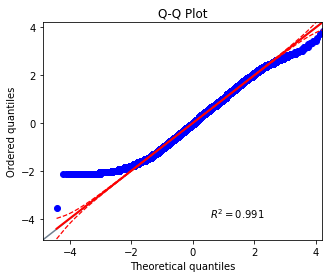

In [26]:
pg.qqplot(loan["age"], dist='norm')